In [116]:
import numpy as np
import json
import matplotlib.pyplot as plt
import matplotlib

with open("/home/max/Documents/Univ/Lyrics2Melody/quantitative_analysis/lstm-gan_stats/gen_stats", "r") as f:
    lstm_results = json.loads(f.read())
with open("/home/max/Documents/Univ/Lyrics2Melody/quantitative_analysis/seq2seq_stats/gen_stats", "r") as f:
    rapport1_results = json.loads(f.read())
with open("/home/max/Documents/Univ/Lyrics2Melody/quantitative_analysis/lstm-gan_stats/ref_stats", "r") as f:
    reference = json.loads(f.read())

#Blue for reference
ref_color="xkcd:azure"
#Green for LSTM-GAN
LSTM_color = "yellowgreen"
#Orange for us
res_color = "orange"

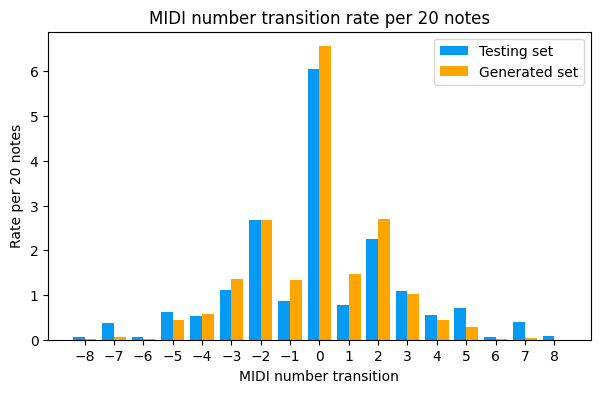

In [117]:

xrange = range(-8,9)
barWidth = 0.4
plt.figure(figsize=(7,4))
plt.bar([x - barWidth/2 for x in xrange], [reference["transitions"][str(float(i))] if str(float(i)) in reference["transitions"] else 0 for i in xrange], barWidth, label="Testing set", color=ref_color)
plt.ylabel("Rate per 20 notes")
plt.xlabel("MIDI number transition")
plt.bar([x + barWidth/2 for x in xrange], [lstm_results["transitions"][str(float(i))] if str(float(i)) in lstm_results["transitions"] else 0 for i in xrange], barWidth, label="Generated set", color=res_color)
plt.title("MIDI number transition rate per 20 notes")
plt.xticks(xrange)
plt.legend()
plt.show()


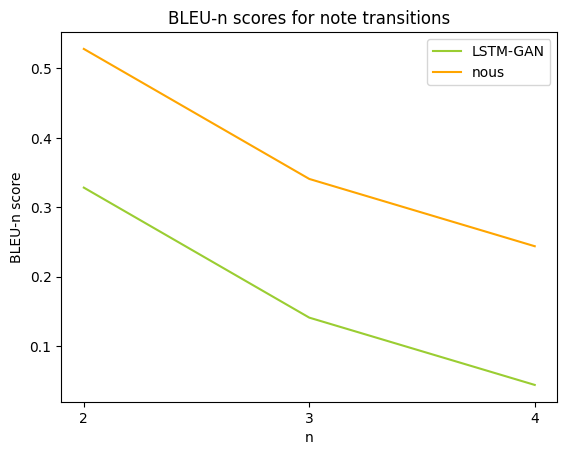

In [118]:
xrange = range(2,5)
plt.plot(xrange, [lstm_results[f"bleu{i}_notes"] for i in xrange], label="LSTM-GAN", color=LSTM_color)
plt.plot(xrange, [lstm_results[f"bleu{i}_notes"]+0.2 for i in xrange], label="nous", color=res_color)
plt.xticks(xrange)
plt.title("BLEU-n scores for note transitions")
plt.ylabel("BLEU-n score")
plt.xlabel("n")
plt.legend()
plt.show()

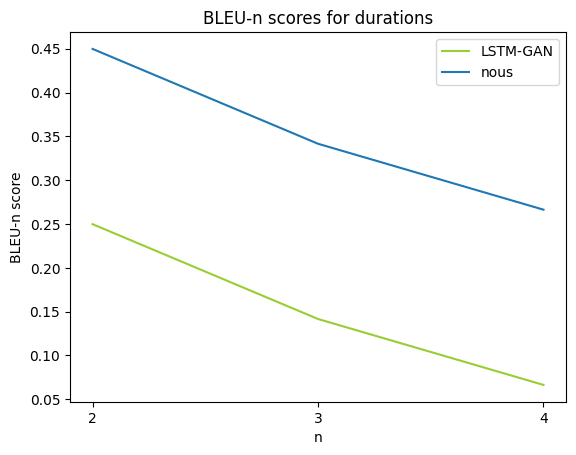

In [119]:
xrange = range(2,5)
plt.plot(xrange, [lstm_results[f"bleu{i}_durations"] for i in xrange], label="LSTM-GAN", color=LSTM_color)
plt.plot(xrange, [lstm_results[f"bleu{i}_durations"]+0.2 for i in xrange], label="nous")
plt.xticks(xrange)
plt.title("BLEU-n scores for durations")
plt.ylabel("BLEU-n score")
plt.xlabel("n")
plt.legend()
plt.show()

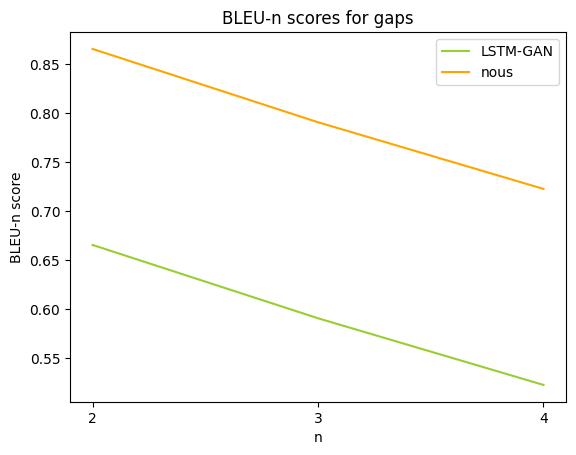

In [120]:
xrange = range(2,5)
plt.plot(xrange, [lstm_results[f"bleu{i}_gaps"] for i in xrange], label="LSTM-GAN", color=LSTM_color)
plt.plot(xrange, [lstm_results[f"bleu{i}_gaps"]+0.2 for i in xrange], label="nous", color=res_color)
plt.xticks(xrange)
plt.title("BLEU-n scores for gaps")
plt.ylabel("BLEU-n score")
plt.xlabel("n")
plt.legend()
plt.show()

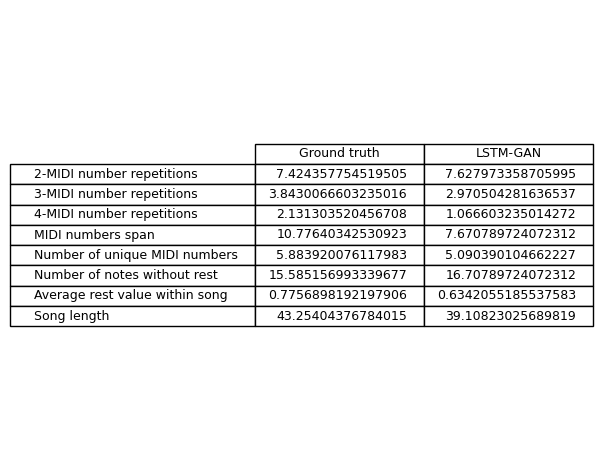

In [144]:
keys = ["rep2", "rep3", "rep4", "span", "unique","restless", "avg_rest", "song_len"]
# fig, ax = plt.subplots()
# plt.patch.set_visible(False)
plt.table(cellText=[[reference[key], lstm_results[key]]for key in keys], colLabels=["Ground truth", "LSTM-GAN"], rowLabels=["2-MIDI number repetitions","3-MIDI number repetitions","4-MIDI number repetitions","MIDI numbers span", "Number of unique MIDI numbers", "Number of notes without rest", "Average rest value within song", "Song length"], loc="center")
plt.axis('off')
plt.axis('tight')
plt.axis()
plt.tight_layout()
plt.show()

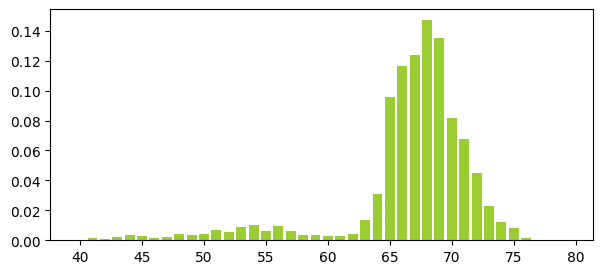

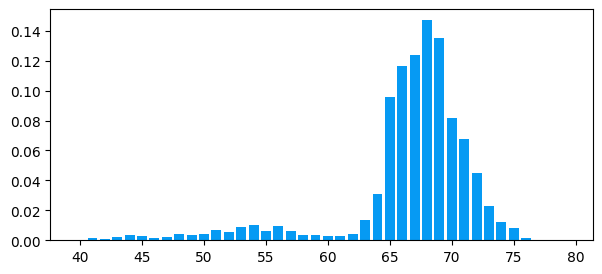

In [122]:
xrange = range(40, 80)
barWidth = 0.4
# plt.figure(figsize=(7,3))
# plt.bar([x - barWidth/2 for x in xrange], [reference["distribution_notes"][str(float(i))]/20 if str(float(i)) in reference["distribution_notes"] else 0 for i in xrange], width=barWidth, color=ref_color)
# plt.bar([x + barWidth/2 for x in xrange], [lstm_results["distribution_notes"][str(float(i))]/20 if str(float(i)) in lstm_results["distribution_notes"] else 0 for i in xrange], width=barWidth, color=res_color)
# plt.show()

barWidth = 0.8
plt.figure(figsize=(7,3))
plt.bar(xrange, [lstm_results["distribution_notes"][str(float(i))]/20 if str(float(i)) in lstm_results["distribution_notes"] else 0 for i in xrange], width=barWidth, color=LSTM_color)
plt.show()

plt.figure(figsize=(7,3))
plt.bar(xrange, [reference["distribution_notes"][str(float(i))]/20 if str(float(i)) in lstm_results["distribution_notes"] else 0 for i in xrange], width=barWidth, color=ref_color)
plt.show()


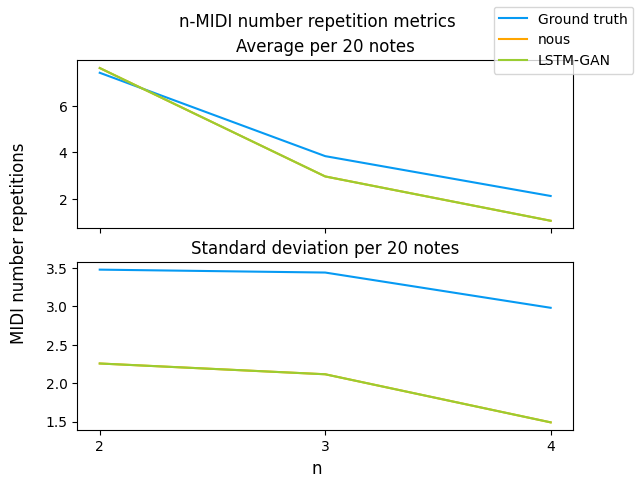

In [143]:
xrange = range(2,5)
fig, axs = plt.subplots(2, sharex=True)
fig.suptitle("n-MIDI number repetition metrics")
axs[0].title.set_text("Average per 20 notes")
axs[1].title.set_text("Standard deviation per 20 notes")

axs[0].plot(xrange, [reference[f"rep{i}"] for i in xrange], label="Ground truth", color=ref_color)
axs[1].plot(xrange, [reference[f"rep{i}_std"] for i in xrange], color=ref_color)

axs[0].plot(xrange, [lstm_results[f"rep{i}"] for i in xrange], label="nous", color=res_color)
axs[1].plot(xrange, [lstm_results[f"rep{i}_std"] for i in xrange], color=res_color)

axs[0].plot(xrange, [lstm_results[f"rep{i}"] for i in xrange], label="LSTM-GAN", color=LSTM_color)
axs[1].plot(xrange, [lstm_results[f"rep{i}_std"] for i in xrange], color=LSTM_color)

plt.setp(axs, xticks=xrange, )
handles, labels = axs[0].get_legend_handles_labels()
fig.legend(handles, labels, loc="upper right")
fig.supxlabel("n")
fig.supylabel("MIDI number repetitions")

plt.show()